
For this assignment, Instead of tokenizing sentances i have tokenized whole text in once.

################################## For Unigram ##################################
Total Ngrams -> 1563084
Ninty Percent Ngrams -> 1406775
Starting to bruteforce from -> 10659
Most frequent n-grams to cover the 90% -> 10668
Unique ngrams -> 81373


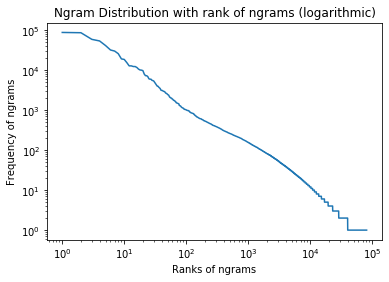

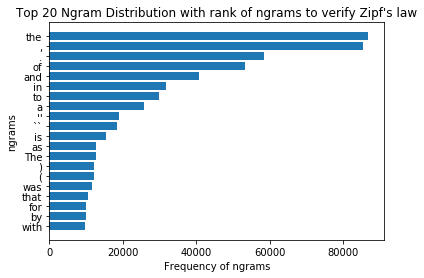

################################## For Bigram ##################################
Total Ngrams -> 1563083
Ninty Percent Ngrams -> 1406774
Starting to bruteforce from -> 447790
Most frequent n-grams to cover the 90% -> 447834
Unique ngrams -> 604143


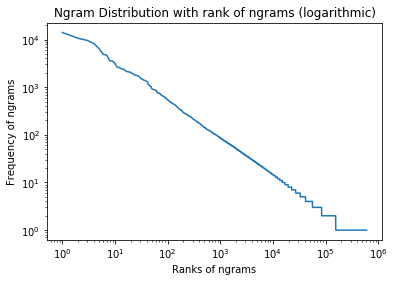

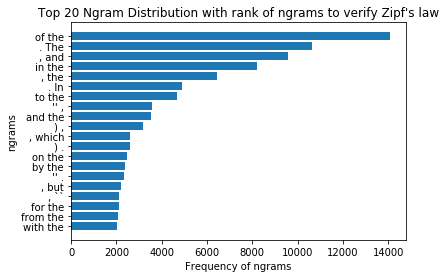

################################## For Trigram ##################################
Total Ngrams -> 1563082
Ninty Percent Ngrams -> 1406773
Starting to bruteforce from -> 1037987
Most frequent n-grams to cover the 90% -> 1038016
Unique ngrams -> 1194325


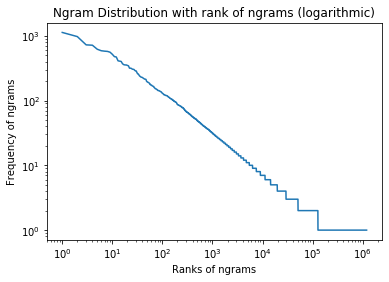

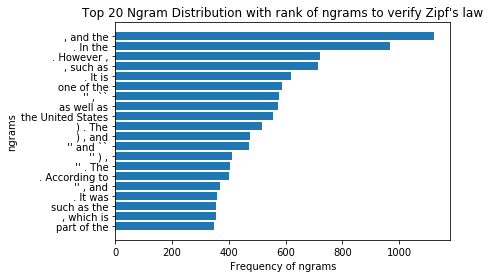

################################## For Unigram with Stemming ##################################
Total Ngrams -> 1563084
Ninty Percent Ngrams -> 1406775
Starting to bruteforce from -> 4410
Most frequent n-grams to cover the 90% -> 4434
Unique ngrams -> 56180


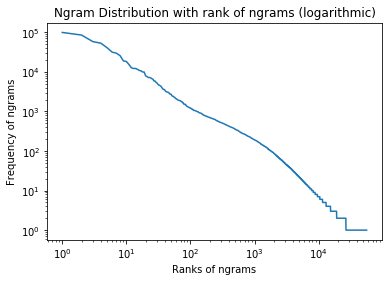

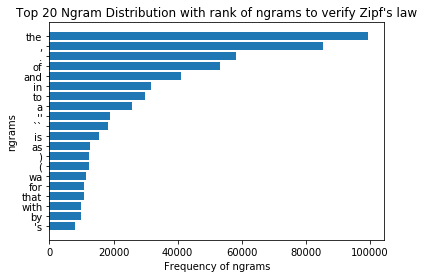

################################## For Bigram with Stemming ##################################
Total Ngrams -> 1563083
Ninty Percent Ngrams -> 1406774
Starting to bruteforce from -> 361231
Most frequent n-grams to cover the 90% -> 361289
Unique ngrams -> 517598


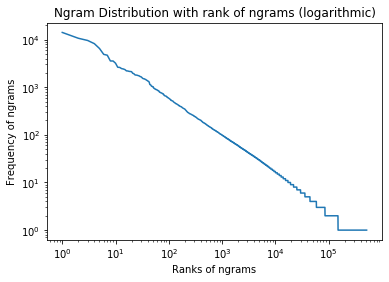

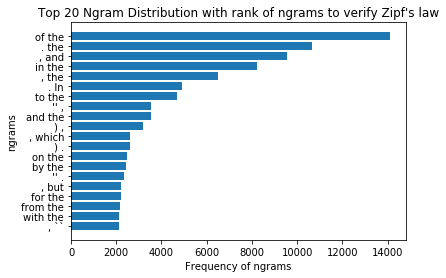

################################## For Trigram with Stemming ##################################
Total Ngrams -> 1563082
Ninty Percent Ngrams -> 1406773
Starting to bruteforce from -> 994875
Most frequent n-grams to cover the 90% -> 994901
Unique ngrams -> 1151210


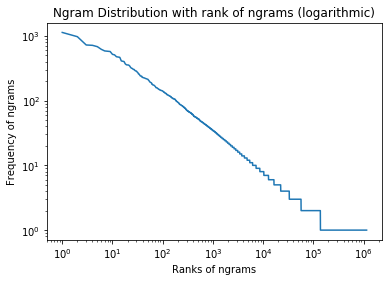

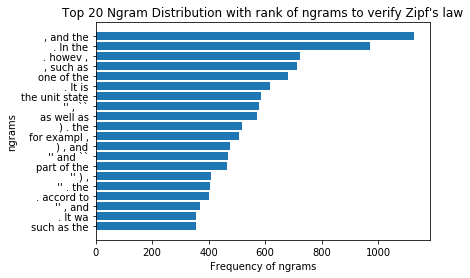

################################## Zipfs Law verification ##################################
 Yes it does follow zipfs law approximatly. We can see that in bar charts plotted for every n-gram case for top 20 ngrams. We can clearly observe that Rank is inversely proportional to frequency.
################################## Libraries used for tokenization and stemming ##################################
I used NLTK. Algorithm used for stemming was Portar Stemming
################################## Exampes where tool used for tokenization did not work properly  ##################################
 
1. When i worked on ubuntu and mac it gave me different results. I inspected and compared generated unigram files using git. i found that if we consider "Beck.."  Mac will generate 1 token  "Beck.." but ubuntu will generate 2 tokens "Beck" and "..", Due to this numbers of generated token can get a little higher on ubuntu compared to mac. 
2. I used word_tokenize on whole document in once. However

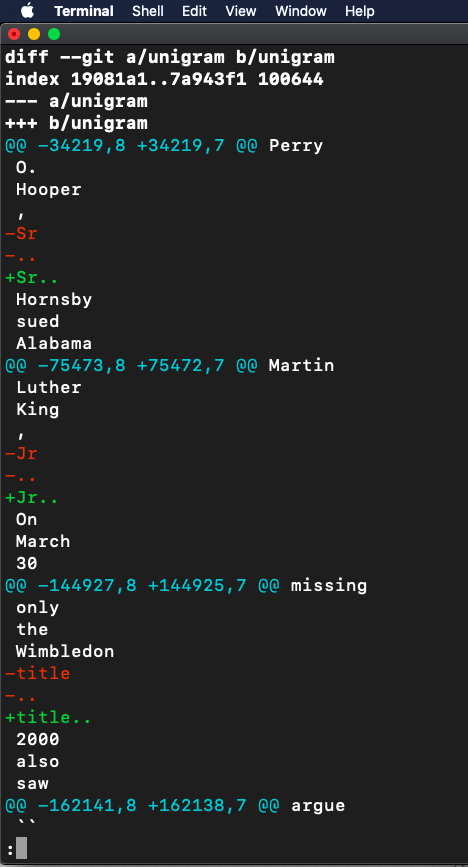

In [2]:
# Import Required Libraries
from bs4 import BeautifulSoup
from nltk.util import ngrams
import nltk
from collections import Counter
import pandas
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from IPython.display import Image

word_tokenize_info = """
For this assignment, Instead of tokenizing sentances i have tokenized whole text in once.
"""
print(word_tokenize_info)

#Stemmer Instance
porter=PorterStemmer()

# Read data from file
data = open("wiki_00",'r').read()
# Parse data and create soup
soup = BeautifulSoup(data, 'html.parser')

# Get all text data after removing all the tags from soup. 
cleaned_data = soup.get_text()

# method to generate ngrams
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

# method to generate ngrams
def extract_ngrams_with_stemming(data, num):
    
    tokens = nltk.word_tokenize(data)
    stem_tokens = []
    
    for token in tokens:
        stem_tokens.append(porter.stem(token))    
    
    n_grams = ngrams(stem_tokens, num)
    return [ ' '.join(grams) for grams in n_grams]

# Method which use Bruteforce to identify 90 percent coverage
## Start percentage passed here is to reduce the time of bruteforce loop to find tokens to cover 90% corpus.
## This will work with only wiki_00 file, as i have hard coded it. If we want to use it in genral, we can pass 0 to start loop from start.
def ngram_to_cover_percentage(ngram_counter, percentage, start_percentage):
    int_counter = 0
    total_ngrams = sum(ngram_counter.values())
    print("Total Ngrams -> " + str(total_ngrams))
    
    percent_of_total_ngrams = int(percentage * total_ngrams)
    
    print("Ninty Percent Ngrams -> " + str(percent_of_total_ngrams))
    
    unique_ngrams_needed = int(len(ngram_counter.items()) * start_percentage) # starting from X percent to reduce loops
    
    print("Starting to bruteforce from -> " + str(unique_ngrams_needed))
    
    ngram_list_sorted_counter = ngram_counter.most_common()
    
    while sum(n for _, n in ngram_list_sorted_counter[:unique_ngrams_needed]) < percent_of_total_ngrams :
        
        # print(str(sum(n for _, n in ngram_list_sorted_counter[:unique_ngrams_needed])) + "<" + str(percent_of_total_ngrams))
        
        unique_ngrams_needed += 1 
        
    print("Most frequent n-grams to cover the 90% -> " + str(unique_ngrams_needed))
    

# Does 3 things Count unique ngram, get most frequent ngrams which cover 90% corpus and plot distribution of frequency
def count_unique__plot_distribution__get_ninty(ngram_list, start_percentage):
    
    ngram_counter = Counter(ngram_list)
    ngram_to_cover_percentage(ngram_counter,0.9,start_percentage)
    
    # Sort by count
    ngram_list_sorted_counter = ngram_counter.most_common()
    
    print("Unique ngrams -> " + str(len(ngram_list_sorted_counter)))
    
    #Get Rank of words for x axis as per sir suggested
    ngram_list_counter_keys_in_rank = list(range(1,len(ngram_list_sorted_counter)+1)) # On X axis
    ngram_list_counter_keys_names_in_rank = [item[0] for item in ngram_list_sorted_counter] # For plotting table
    ngram_list_counter_values_in_frequency = [item[1] for item in ngram_list_sorted_counter] # On Y axis
    
    
    plt.plot(ngram_list_counter_keys_in_rank, ngram_list_counter_values_in_frequency, label="All")
    
    
    plt.xlabel("Ranks of ngrams")
    plt.ylabel("Frequency of ngrams")
    plt.title("Ngram Distribution with rank of ngrams (logarithmic)")
    plt.xscale("log")
    plt.yscale("log")    
    plt.show()
    
    
    top_twenty_key_names = ngram_list_counter_keys_names_in_rank[:20]
    top_twenty_frequency = ngram_list_counter_values_in_frequency[:20]
    top_twenty_key_names.reverse()
    top_twenty_frequency.reverse()
    plt.barh(top_twenty_key_names, top_twenty_frequency, label="Top 20")
       
    plt.xlabel("Frequency of ngrams")
    plt.ylabel("ngrams")
    plt.title("Top 20 Ngram Distribution with rank of ngrams to verify Zipf's law")
    
    plt.show()
    
# generate unigram
unigram_list = extract_ngrams(cleaned_data, 1)
# generate bigram
bigram_list = extract_ngrams(cleaned_data, 2)
# generate trigram
trigram_list = extract_ngrams(cleaned_data, 3)

# generate unigram with stem
unigram_list_with_stemming = extract_ngrams_with_stemming(cleaned_data, 1)
# generate bigram with stem
bigram_list_with_stemming = extract_ngrams_with_stemming(cleaned_data, 2)
# generate trigram with stem
trigram_list_with_stemming = extract_ngrams_with_stemming(cleaned_data, 3)

## Start percentage passed here is to reduce the time of bruteforce loop to find tokens to cover 90% corpus.
## This will work with only wiki_00 file, as i have hard coded it. If we want to use it in genral, we can pass 0 to start loop from start.
# Q1 Starts
print("################################## For Unigram ##################################")    
count_unique__plot_distribution__get_ninty(unigram_list, 0.131)
# Q1 Ends

# Q2 Starts
print("################################## For Bigram ##################################")    
count_unique__plot_distribution__get_ninty(bigram_list, 0.7412)
# Q2 Ends

# Q3 Starts
print("################################## For Trigram ##################################")    
count_unique__plot_distribution__get_ninty(trigram_list, 0.8691)
# Q3 Ends

# Q4 Starts
print("################################## For Unigram with Stemming ##################################")    
count_unique__plot_distribution__get_ninty(unigram_list_with_stemming, 0.0785)

print("################################## For Bigram with Stemming ##################################")    
count_unique__plot_distribution__get_ninty(bigram_list_with_stemming, 0.6979)

print("################################## For Trigram with Stemming ##################################")    
count_unique__plot_distribution__get_ninty(trigram_list_with_stemming, 0.8642)
# Q4 Ends


# Q5 Starts
print("################################## Zipfs Law verification ##################################")  
answer_5 = """ Yes it does follow zipfs law approximatly. We can see that in bar charts plotted for every n-gram case for top 20 ngrams. We can clearly observe that Rank is inversely proportional to frequency."""
print(answer_5)
# Q5 Ends

# Q6 Starts
print("################################## Libraries used for tokenization and stemming ##################################")  
answer_6 = """I used NLTK. Algorithm used for stemming was Portar Stemming"""
print(answer_6)
# Q6 Ends

# Q7 Starts
print("################################## Exampes where tool used for tokenization did not work properly  ##################################")  
answer_7 = """ 
1. When i worked on ubuntu and mac it gave me different results. I inspected and compared generated unigram files using git. i found that if we consider "Beck.."  Mac will generate 1 token  "Beck.." but ubuntu will generate 2 tokens "Beck" and "..", Due to this numbers of generated token can get a little higher on ubuntu compared to mac. 
2. I used word_tokenize on whole document in once. However word_tokenize works only at the sentence level. So i'll have to split at the sentence level and the tokenize the sentences for precise results, but for the simplicity of assignment i used it drectly. 
3. When i first used tokenize it gave me a token something like "'xxx". Although it is correct in case of 'll or 've when we write i'll or i've but sometimes it can cause issues for direct sentances. 
"""
print(answer_7)
Image(filename="mac_ubuntu_diff.png")
# Q7 Ends
